In [1]:
from numpy import *
import matplotlib.pyplot as plt
 
# 加载本地数据
def loadDataSet(fileName):
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('      ')
        fltLine = list(map(float,curLine)) # 映射所有数据为浮点数
        dataMat.append(fltLine)
    return dataMat
 
# 欧式距离计算
def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) # 格式相同的两个向量做运算
 
# 中心点生成 随机生成最小到最大值之间的值
def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n))) # 创建中心点，由于需要与数据向量做运算，所以每个中心点与数据得格式应该一致（特征列）
    for j in range(n):  # 循环所有特征列，获得每个中心点该列的随机值
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = mat(minJ + rangeJ * random.rand(k,1)) # 获得每列的随机值 一列一列生成
    return centroids
 
# 返回 中心点矩阵和聚类信息
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2))) # 创建一个矩阵用于记录该样本 （所属中心点 与该点距离）
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False  # 如果没有点更新则为退出
        for i in range(m):
            minDist = inf; minIndex = -1
            for j in range(k):  # 每个样本点需要与 所有 的中心点作比较
                distJI = distMeas(centroids[j,:],dataSet[i,:])  # 距离计算
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: # 若记录矩阵的i样本的所属中心点更新，则为True，while下次继续循环更新
                clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2   # 记录该点的两个信息
        # print(centroids)
        for cent in range(k): # 重新计算中心点
            # print(dataSet[nonzero(clusterAssment[:,0] == cent)[0]]) # nonzero返回True样本的下标
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]] # 得到属于该中心点的所有样本数据
            centroids[cent,:] = mean(ptsInClust, axis=0) # 求每列的均值替换原来的中心点
    return centroids, clusterAssment
 
datMat = mat(loadDataSet('data.txt'))
myCentroids,clustAssing = kMeans(datMat,4)
print(myCentroids)
print(clustAssing)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(myCentroids[:,0].flatten().A[0],myCentroids[:,1].flatten().A[0],color='r',s=60)
ax.scatter(datMat[:,0].flatten().A[0],datMat[:,1].flatten().A[0])
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data.txt'

# 二分k-means算法

In [4]:
from numpy import *
from math import *
 
'''
loadDataSet(fileName)函数将文本文件导入到一个列表中，
文本文件每一行为tab分隔的浮点数，
每一个列表会被添加到dataMat中，最后返回dataMat，
该返回值是一个包含许多其他列表的列表
'''
def loadDataSet(fileName):
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('      ')
        fltLine = list(map(float,curLine))
        dataMat.append(fltLine)
    return dataMat
 
'''
distEclud(vecA, vecB)函数计算两个向量的欧式距离
公式：sqrt((x1-x2)^2+(y1-y2)^2)
'''
def distEclud(vecA, vecB):
    return math.sqrt(sum(power(vecA - vecB, 2)))
 
'''
randCent()函数为给定数据集构建一个包含k个随机质心的集合。
随机质心必须要在整个数据集的边界之内，这可以通过找到数据集每一维的最小值和最大值来完成。
然后生成0到1.0之间的随机数并通过取值范围和最小值，以便确保随机点在数据的边界之内。
'''
def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n)))#创建存储k个质心的矩阵
    for j in range(n):#在边界范围内，随机生成k个质心
        minJ = min(dataSet[:,j]) #边界的最小值
        rangeJ = float(max(dataSet[:,j]) - minJ) #边界范围
        centroids[:,j] = mat(minJ + rangeJ * random.rand(k,1))
    return centroids
'''
二分K-均值聚类算法
'''
def biKmeans(dataSet, k, distMeas=distEclud):
    m = shape(dataSet)[0]#确定数据集中数据点的总数
    
    #创建一个矩阵来存放每个点的簇分配结果，包含两列：一列是记录簇索引值，第二列是存储误差。
    #误差是指当前点到簇质心的距离，后面将使用该误差来评价聚类的效果。
    clusterAssment = mat(zeros((m,2)))
 
    centroid0 = mean(dataSet, axis=0).tolist()[0]#计算整个数据集的质心，即初始时的质心的坐标为所有数据点的均值
    centList =[centroid0] #创建一个初始化只要一个初始质心的列表
    
    #计算所有数据点到初始质心的距离平方误差
    for j in range(m):
        clusterAssment[j,1] = distMeas(mat(centroid0), dataSet[j,:])**2
        
    #该while循环不断地对簇进行划分，直到得到设定的簇数目为止
    while (len(centList) < k):
        lowestSSE = inf
        for i in range(len(centList)):#对每一个质心
            ptsInCurrCluster = dataSet[nonzero(clusterAssment[:,0].A==i)[0],:]#将当前簇i中的所有数据看成一个小的数据集
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)#通过KMeans()函数，得到生成两个质心的簇，即二分，获取到质心及其每个簇的误差值
            #将二分kMeans结果中的平方和的距离进行求和
            sseSplit = sum(splitClustAss[:,1])#compare the SSE to the currrent minimum
            #将未参与二分kMeans分配结果中的平方和的距离进行求和
            sseNotSplit = sum(clusterAssment[nonzero(clusterAssment[:,0].A!=i)[0],1])
            print("sseSplit, and notSplit: ",sseSplit,sseNotSplit)
            #？？？总的（未拆分和已拆分）误差和越小，越相似，效果越优化，划分的结果越好
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        bestClustAss[nonzero(bestClustAss[:,0].A == 1)[0],0] = len(centList) #调用二分kMeans的结果，默认簇是0,1
        bestClustAss[nonzero(bestClustAss[:,0].A == 0)[0],0] = bestCentToSplit #更新为最佳质心
        print('最好的质心列表是: ',bestCentToSplit)
        print('最好的簇分配结果的长度是the len of bestClustAss is: ', len(bestClustAss))
        #更新质心列表
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0]#更新原来的质心list中的第i个质心为使用二分kMeans后最好的质心的第一个质心
        centList.append(bestNewCents[1,:].tolist()[0])#添加最佳质心的第二个质心
        clusterAssment[nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:]= bestClustAss#重新分配最好簇下的数据（质心）以及误差平方和
    return mat(centList), clusterAssment

#画图
def show(dataSet, k, centroids, clusterAssment):
    from matplotlib import pyplot as plt  
    numSamples, dim = dataSet.shape  
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']  
    for i in range(numSamples):  
        markIndex = int(clusterAssment[i, 0])  
        plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex])  
    mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']  
    for i in range(k):  
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 7, color='orange')
    plt.show()

def main():
    dataMat = mat(loadDataSet('data.txt'))
    # 指定获取四个质心
    #myCentroids, clustAssing= kMeans(dataMat,4)
    myCentroids, clustAssing = biKmeans(dataMat, 4)
    print("--------------------------------------------------")
    print("最终的质心列表：")
    print(myCentroids)
    print("--------------------------------------------------")
    show(dataMat, 4, myCentroids, clustAssing)
 
 
if __name__ == '__main__':
    main()

NameError: name 'KMeans' is not defined

# knn算法实现

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
data_=pd.read_csv('vehicle.csv')
print(data_)
feature=np.array(data_.iloc[:,0:2])  # 将参数与特征进行分离，返回数据类型为数组,这里只拿去前两列
#print(feature)
labels = data_['label'].tolist()   # 将'label'标签提取出来转换为列表类型,方便后续使用
#print(labels)

# 数据可视化
#plt.scatter(data_['length'][data_['label']=='car'],data_['width'][data_['label']=='car'],c='y')  #先取length的数值,里面有car和truck的长度,再单独取label那一行为car的值
#plt.scatter(data_['length'][data_['label']=='truck'],data_['width'][data_['label']=='truck'],c='r')  #先取width的数值,里面有car和truck的长度,再单独取label那一行为truck的值
#print(data_['length'])
#print(plt.show())

test = [4.7,2.1] # 待测样本

numSamples = data_.shape[0]  # 读取矩阵的长度,这里是读取第一维的长度# 运行结果：150
diff_= np.tile(test,(numSamples,1)) #这里表示test列表竖向重复150次，横向重复1一次，组成一个素组
# numpy.tile(A,B)函数：A=[4.7,2.1]，B=（3,4）,意思是列表A在行方向（从上到下）重复3次，在列放心（从左到右）重复4次
diff = diff_-feature  # 利用这里的实验值和样本空间里的每一组数据进行相减
squreDiff = diff**2   # 将差值进行平方
squreDist = np.sum(squreDiff,axis=1)  # 每一列横向求和，最后返回一维数组
distance = squreDist ** 0.5 
sorteDisIndices = np.argsort(distance)  # 排序
k=9  # k个最近邻
classCount = {}  # 字典或者列表的数据类型需要声明
label_count=[]   # 字典或者列表的数据类型需要声明
for i in range(k):
    voteLabel = labels[sorteDisIndices[i]]
    classCount[voteLabel] = classCount.get(voteLabel,0) + 1
    label_count.append(voteLabel)

from collections import Counter
word_counts = Counter(label_count)
top = word_counts.most_common(1)   # 返回数量最多的值以及对应的标签
#print(word_counts)
#print(top)

FileNotFoundError: File b'vehicle.csv' does not exist

# knn算法实现手写字符体识别-sklearn版本

In [3]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
a=datasets.load_digits()
print(a)
#print(pd.Series(a.target))
y=pd.DataFrame(a.target)
print(a.data.shape)
X=pd.DataFrame(a.data)
#print(X)
X_train,X_val,train_y,val_y=train_test_split(X,y,random_state=1)#划分测试集和
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train,train_y)
knn_reg.score(X_val,val_y)##计算准确率

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

0.9850879167458381

# knn实现手写字符体识别-sklearn版本2

In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
def to_float(lis):
    return float(lis)
a=datasets.load_digits()
#print(a)
#print(pd.Series(a.target))
y=pd.DataFrame(a.target)
print(a.data)
X=pd.DataFrame(a.data)
#print(X)
X_train,X_val,train_y,val_y=train_test_split(X,y,random_state=1)#划分测试集和
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train,train_y)
prediction=knn_reg.predict(X_val)
print(len(prediction))
pre=[]
#print((val_y))
for i in prediction:
    pre.append(i[0])
#print(pre)
val=(list(val_y[0]))
#print(map(to_float,val))
m=pd.DataFrame({'prediction':list(pre),'val':list(map(to_float,val))})
print(m)
knn_reg.score(X_val,val_y)##计算准确率

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
450
     prediction  val
0           1.0  1.0
1           5.0  5.0
2           0.0  0.0
3           7.0  7.0
4           1.0  1.0
5           0.0  0.0
6           6.0  6.0
7           1.0  1.0
8           5.0  5.0
9           4.0  4.0
10          9.0  9.0
11          2.0  2.0
12          7.0  7.0
13          8.0  8.0
14          4.0  4.0
15          6.0  6.0
16          9.0  9.0
17          3.0  3.0
18          7.0  7.0
19          4.0  4.0
20          7.0  7.0
21          1.0  1.0
22          8.0  8.0
23          6.0  6.0
24          0.0  0.0
25          9.0  9.0
26          6.0  6.0
27          1.0  1.0
28          3.0  3.0
29          7.0  7.0
..          ...  ...
420         5.0  5.0
421         4.0  4.0
422         9.0  9.0
423         0.0  0.0
424         5.0  5.0
425         9.0  9.0
426   

0.9850879167458381

# pca对irs实现降维测试·

(4,) (150, 4)
特征值，特征向量
[4.22484077 0.24224357 0.07852391 0.02368303] [[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]
[3 2 1 0]
[[ 0.36158968 -0.65653988]
 [-0.08226889 -0.72971237]
 [ 0.85657211  0.1757674 ]
 [ 0.35884393  0.07470647]]
[[ 0.36158968 -0.65653988]
 [-0.08226889 -0.72971237]
 [ 0.85657211  0.1757674 ]
 [ 0.35884393  0.07470647]]


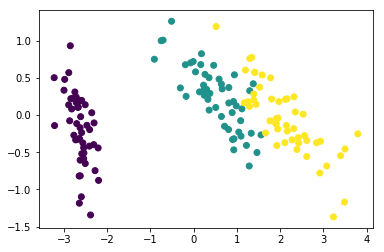

In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
x_data = iris.data
y_data = iris.target
#print(x_data.shape)

def zeroMean(dataMat):
    meanVal = np.mean(dataMat, axis= 0)
    newData = dataMat - meanVal
    print(meanVal.shape,newData.shape)
    return newData, meanVal

def PCA(dataMat, top):
    #数据中心化
    newData, meanVal = zeroMean(dataMat)
    #cov用于求协方差矩阵，参数rowvar = 0说明数据一行代表一个样本
    covMat = np.cov(newData, rowvar=0)
    #np.linalg.eig用于求矩阵的特征值和特征向量
    eigVals, eigVects = np.linalg.eig(np.mat(covMat))
    print("特征值，特征向量")
    print(eigVals,eigVects)
    #对特征值从小到大排列
    eigValIndice = np.argsort(eigVals)
    print(eigValIndice)
    #得到最大的n个特征值的下标
    n_eigValIndice = eigValIndice[-1:-(top + 1): -1]
    #得到下标对应的特征向量
    n_eigVects = eigVects[:, n_eigValIndice]
    print(n_eigVects)
    #低维特征空间的数据
    lowDDataMat = newData * n_eigVects
    # print(newData)
    print(n_eigVects)
    # print(lowDDataMat)
    #利用低维度数据来重构数据
    reconMat = (lowDDataMat * n_eigVects.T) + meanVal
    return lowDDataMat, reconMat


#将数据降至2维
lowDDataMat, reconMat = PCA(x_data, 2)


x = np.array(lowDDataMat)[:, 0]
y = np.array(lowDDataMat)[:, 1]
plt.scatter(x, y, c = y_data)
plt.show()

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
x_data = iris.data
y_data = iris.target

#print(x_data)
#print(y_data)
def zeroMean(dataMat):
    meanVal = np.mean(dataMat, axis= 0)
    newData = dataMat - meanVal
    return newData, meanVal

def PCA(dataMat, top):
    #数据中心化
    newData, meanVal = zeroMean(dataMat)
    #cov用于求协方差矩阵，参数rowvar = 0说明数据一行代表一个样本
    #print("____")
    #print(newData)
    covMat = np.cov(newData, rowvar=0)
    #np.linalg.eig用于求矩阵的特征值和特征向量
    eigVals, eigVects = np.linalg.eig(np.mat(covMat))
    #对特征值从小到大排列
    eigValIndice = np.argsort(eigVals)
    #得到最大的n个特征值的下标
    n_eigValIndice = eigValIndice[-1:-(top + 1): -1]
    #print(")))______")
    #print(eigVects)
    #print(n_eigValIndice)
    #得到下标对应的特征向量
    n_eigVects = eigVects[:, n_eigValIndice]
    #print(n_eigVects)
    #低维特征空间的数据
    lowDDataMat = newData * n_eigVects
    # print(newData)
    #print(n_eigVects)
    # print(lowDDataMat)
    #利用低维度数据来重构数据
    reconMat = (lowDDataMat * n_eigVects.T) + meanVal
    return lowDDataMat, reconMat


def knn_irs(lowDDataMat,y_data):
    train_X,val_X,train_y,val_y=train_test_split(lowDDataMat,y_data,test_size=0.2,random_state=0)  
    knn_reg = KNeighborsRegressor()
    knn_reg.fit(train_X,train_y)
    prediction=knn_reg.predict(val_X)
    print("PRDICT:")
    #rint(prediction)
    score=knn_reg.score(val_X,val_y)##计算准确率
    print(score)
#将数据降至2维
lowDDataMat, reconMat = PCA(x_data, 2)#x_data为ndarrary类型
#print(x_data)
#x = np.array(lowDDataMat)[:, 0]
#y = np.array(lowDDataMat)[:, 1]
from sklearn.model_selection import train_test_split

from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

knn_irs(lowDDataMat,y_data)
knn_irs(x_data,y_data)

PRDICT:
0.9752577319587629
PRDICT:
0.9703092783505155
